## HW7 making some pretty plots by dlk253

In [93]:
#importing some stuff
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline
import csv
import requests
import zipfile


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [94]:
#setting up the envt variable and making sure it exists
os.getenv("PUIDATA") 

'/home/cusp/dlk253/PUIdata'

In [95]:
#downloading the data from may 2016
datestring = '201605'
#bring in the citybike data from may 2016
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40.4M  100 40.4M    0     0  16.3M      0  0:00:02  0:00:02 --:--:-- 17.5M


In [96]:
#unzipping and putting into PUIDATA
zip_ref = zipfile.ZipFile(datestring+"-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))

In [97]:
#opening CSV and plotting the head to see what we can work with
df = pd.read_csv(zip_ref.open(datestring+'-citibike-tripdata.csv'))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1


In [98]:
#lets get rid of the stuff we do not need and keep trip duration, birth year, and gender
df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12]], axis=1,inplace=True)
df.head()

,tripduration,birth year,gender
0,538,1986.0,2
1,224,1977.0,1
2,328,1980.0,1
3,1196,NaN,0
4,753,1981.0,1


In [99]:
#lets figure out the age based on birth year
#calculating the age
df['age'] = 2016 - df['birth year']
df.tripduration = df.tripduration/60
df.head()

,tripduration,birth year,gender,age
0,8.966667,1986.0,2,30.0
1,3.733333,1977.0,1,39.0
2,5.466667,1980.0,1,36.0
3,19.933333,NaN,0,NaN
4,12.550000,1981.0,1,35.0


In [100]:
#lets get rid of birth year now and just use age
df.drop(df.columns[[1]], axis=1,inplace=True)
df.dropna(inplace = True)
df.head()

,tripduration,gender,age
0,8.966667,2,30.0
1,3.733333,1,39.0
2,5.466667,1,36.0
4,12.550000,1,35.0
5,8.516667,1,25.0


In [101]:
df.males = df[df['gender'] == 1]
df.females = df[df['gender'] == 2]


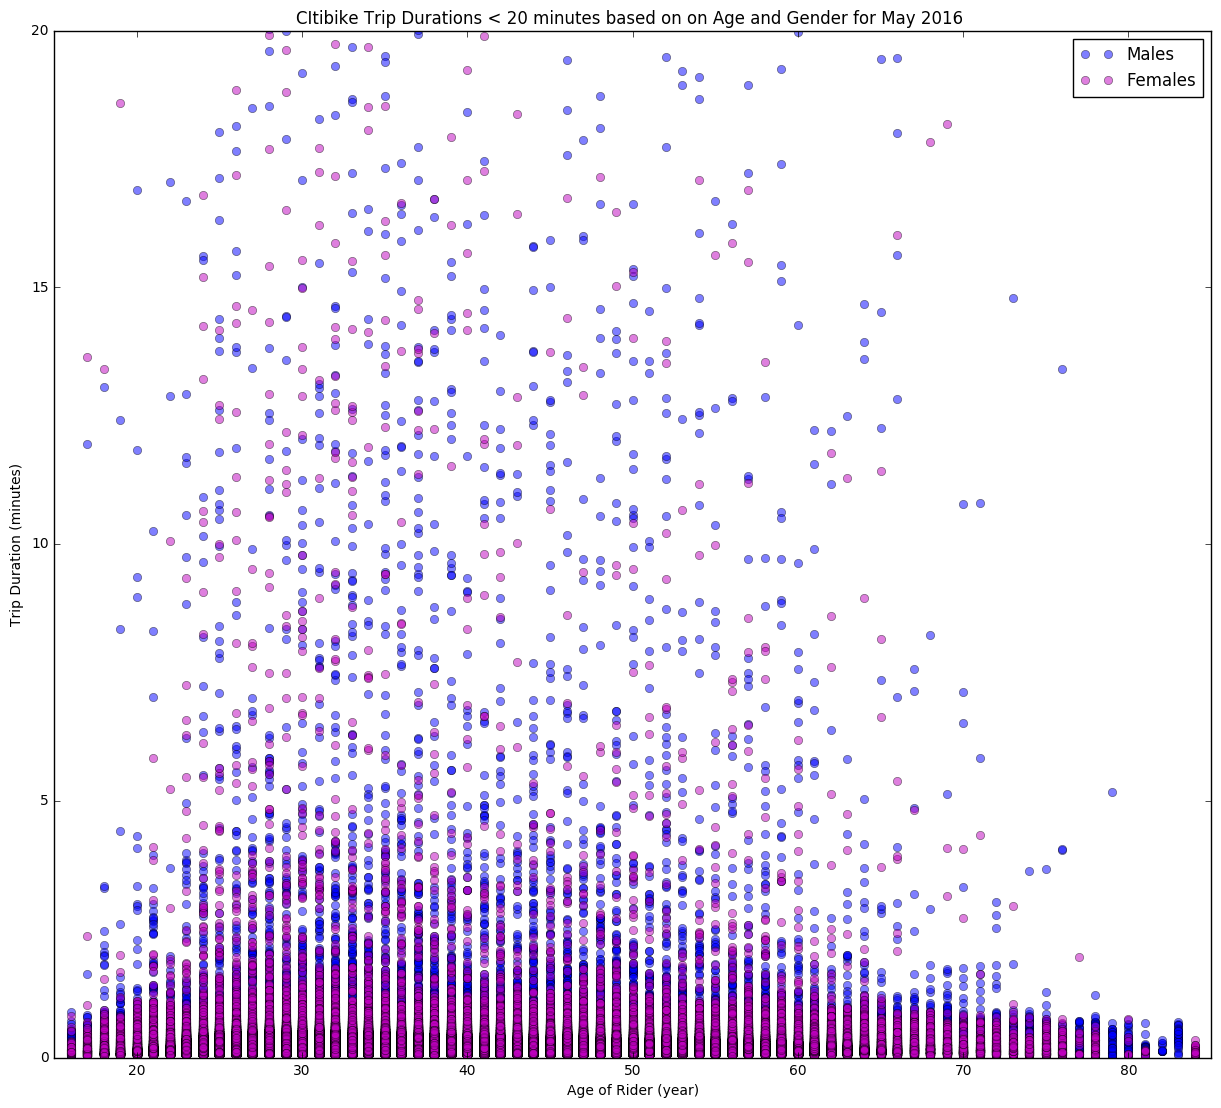

In [135]:
plt.figure(figsize=(13,13))
plt.plot(df.males.age,df.males.tripduration/60,'o', label='My Data', color='b', alpha = 0.5, linewidth=0.5)
plt.plot(df.females.age,df.females.tripduration/60,'o', label='My Data', color='m',alpha = 0.5, linewidth=0.5)
plt.xlim(15, 85)
plt.ylim(0, 20)
plt.xlabel('Age of Rider (year)')
plt.ylabel('Trip Duration (minutes)')
plt.title('CItibike Trip Durations < 20 minutes based on on Age and Gender for May 2016 ')
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.99, top=0.99)
plt.legend(["Males", "Females"])
plt.show()

<b>Figure 1:</b> Trip duration based on age and gender for citibike riders during May 2016. By zooming in on rides that are less than 20 minutes it can be seen that there is a pretty even distribution of gender based on trip diruation, regardless of the age. When considering both males and females over the age of 70, it can be concluded that very trips (those that are > 5 minutes are being taken).  I used the dots as a way to show the individual instances of the trip, instead of a bar graph, this works only when the data is zoomed way in. 

